# G2M insight for Cab Investment Firm

# G2M Case Study

Project Detail:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

Data set: 

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection.

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [7]:
#load dataset
cab_data =pd.read_csv(r"C:\Users\Subhendu\OneDrive\Desktop\excelAllFiles\InternshipData\Cab_Data.csv")
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [8]:
#load data
city_data =pd.read_csv(r"C:\Users\Subhendu\OneDrive\Desktop\excelAllFiles\InternshipData\City.csv")
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [9]:
#import data
customer =pd.read_csv(r"C:\Users\Subhendu\OneDrive\Desktop\excelAllFiles\InternshipData\Customer_ID.csv")
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [10]:
transaction =pd.read_csv(r"C:\Users\Subhendu\OneDrive\Desktop\excelAllFiles\InternshipData\Transaction_ID.csv")
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [11]:
#Basic data overview
print(cab_data.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011       1/8/2016  Pink Cab  ATLANTA GA         30.45   
1        10000012       1/6/2016  Pink Cab  ATLANTA GA         28.62   
2        10000013       1/2/2016  Pink Cab  ATLANTA GA          9.04   
3        10000014       1/7/2016  Pink Cab  ATLANTA GA         33.17   
4        10000015       1/3/2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [12]:
print(city_data.head())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [13]:
print(customer.head())

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [14]:
print(transaction.head())

   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [15]:
#check the shape of whole data set
print('shape of cab_data',cab_data.shape)
print('shape of city_data',city_data.shape)
print('shape of customer',customer.shape)
print('shape of transaction',transaction.shape)


shape of cab_data (359392, 7)
shape of city_data (20, 3)
shape of customer (49171, 4)
shape of transaction (440098, 3)


In [16]:
#check information of data
print(cab_data.info())
print(customer.info())
print(transaction.info())
print(city_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

# data cleaning and vizualization

In [17]:
# data cleaning and vizualization
for col in cab_data.columns:
    if  ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ', '_')})

In [18]:
cab_data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [19]:
for col in transaction.columns:
    if ' 'in col:
        transaction = transaction.rename(columns={col:col.replace(' ','_')})

In [20]:
transaction.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [21]:
for col in customer.columns:
    if ' ' in col:
        cutomer = customer.rename(columns={col:col.replace(' ','_')}, inplace=True)

In [22]:
customer.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [23]:
city_data.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [24]:
#change data type
cab_data['Date_of_Travel']=pd.to_datetime(cab_data['Date_of_Travel'], errors='coerce')


In [25]:
print(cab_data['Date_of_Travel'].dtype)

datetime64[ns]


In [26]:
# Extract Year and Month into separate columns
cab_data['Year'] = cab_data['Date_of_Travel'].dt.year
cab_data['Month'] = cab_data['Date_of_Travel'].dt.month

In [27]:
cab_data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1


In [28]:
# splitting thr dataser based on the company column
pinkcab= cab_data[cab_data['Company']== 'Pink Cab']
yellowcab = cab_data[cab_data['Company']== 'Yellow Cab']

In [29]:
cab_data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1


In [30]:
#compare the monthly revenue for both the company
pink_revenue = cab_data[cab_data.Company=='Pink Cab'].groupby('Month')['Price_Charged'].sum()
yellow_revenue =cab_data[cab_data.Company=='Yellow Cab'].groupby('Month')['Price_Charged'].sum()


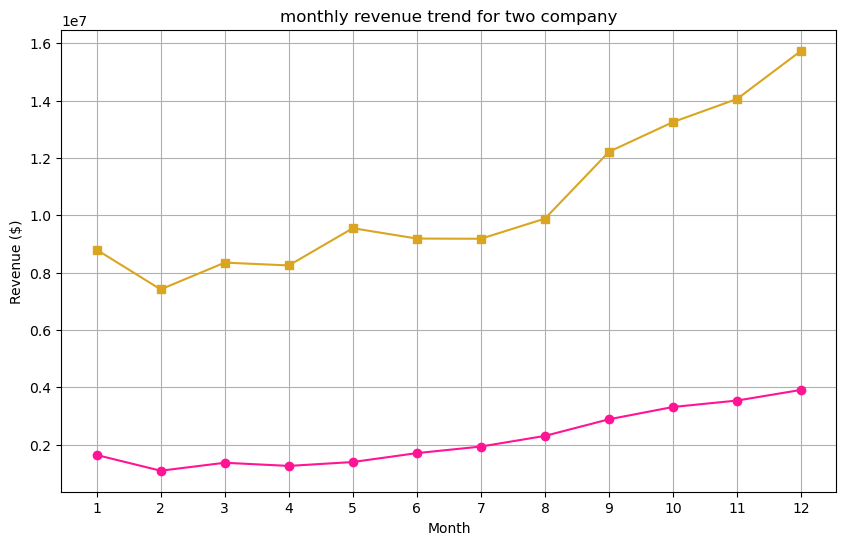

In [31]:
# plot the monthly revenue comparison
plt.figure(figsize=(10,6))
plt.plot(pink_revenue, label= 'Pink Cab', color='deeppink', marker='o')
plt.plot(yellow_revenue, label= 'Yellow Cab', color='goldenrod', marker='s')
plt.title('monthly revenue trend for two company')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(range(1,13))
plt.grid(True)
plt.savefig('monthy_revenue.jpg', format='jpg', bbox_inches = 'tight')

plt.show()

# here we can see yellow cab monthly revenue higher than pink cab

In [32]:
#monthly transaction analysis
mtran= cab_data[cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
mtran

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

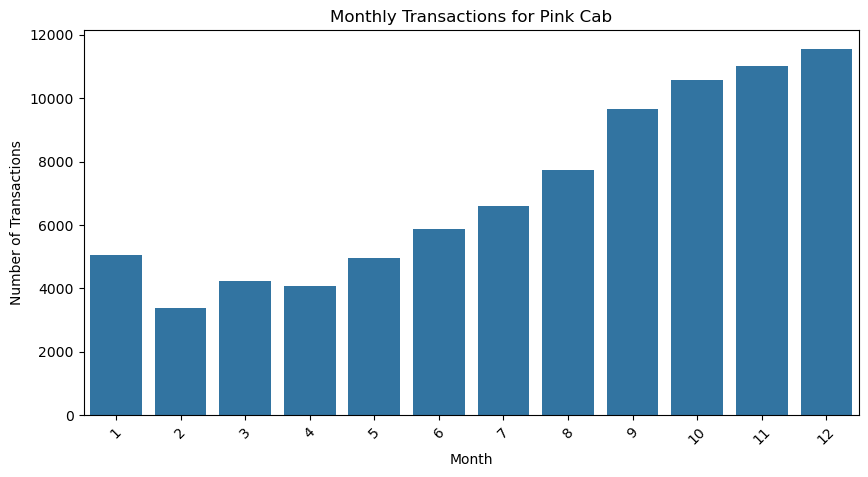

In [33]:
#montly transaction for Pinkcab
plt.figure(figsize=(10,5))
sns.barplot(x=mtran.index,y=mtran.values)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions for Pink Cab')
plt.xticks(rotation=45)
plt.savefig('monthy_transaction.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

In [34]:
mtran1 = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
mtran1

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

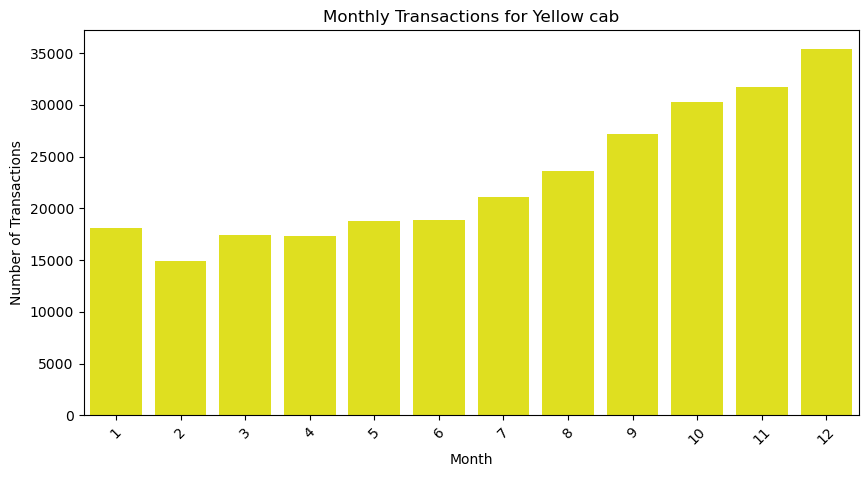

In [35]:
# montly transaction for yellowcab
plt.figure(figsize=(10,5))
sns.barplot(x=mtran1.index,y=mtran1.values,color='yellow')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions for Yellow cab')
plt.xticks(rotation=45)
plt.savefig('monthy_tran_ye.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

# people using cab is higher in holiday time and yellow cab(35000) is more prefarable over pink cab(11000).

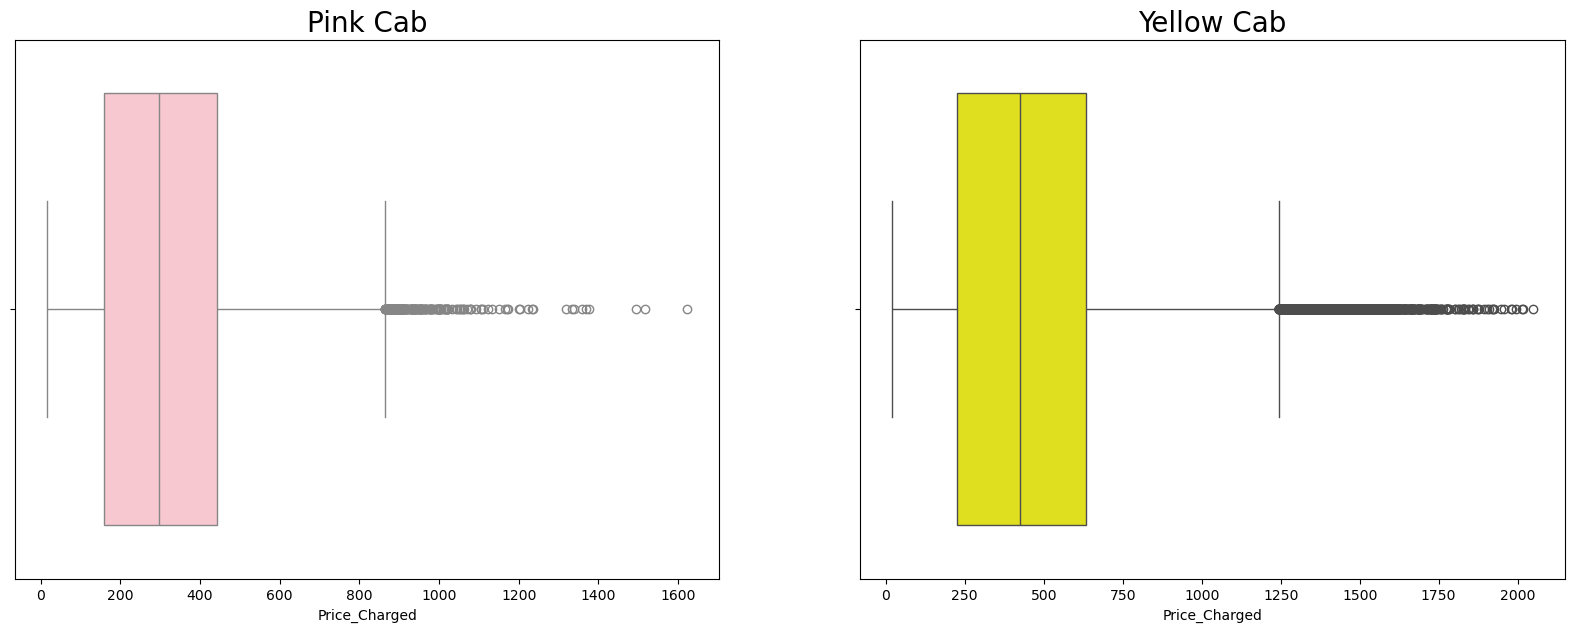

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

# Boxplot for Pink Cab
sns.boxplot(x=cab_data[cab_data['Company'] == 'Pink Cab']['Price_Charged'], ax=ax1, color='pink')
ax1.set_title('Pink Cab', fontsize=20)

# Boxplot for Yellow Cab
sns.boxplot(x=cab_data[cab_data['Company'] == 'Yellow Cab']['Price_Charged'], ax=ax2, color='yellow')
ax2.set_title('Yellow Cab', fontsize=20)
plt.savefig('boxplot.jpg', format='jpg', bbox_inches = 'tight')

plt.show()

In [37]:
#The price charge is more in yellow cab than pink cab
#here we can see outlier also, but keep it, the outlier is showing for high end car.

<Figure size 1200x600 with 0 Axes>

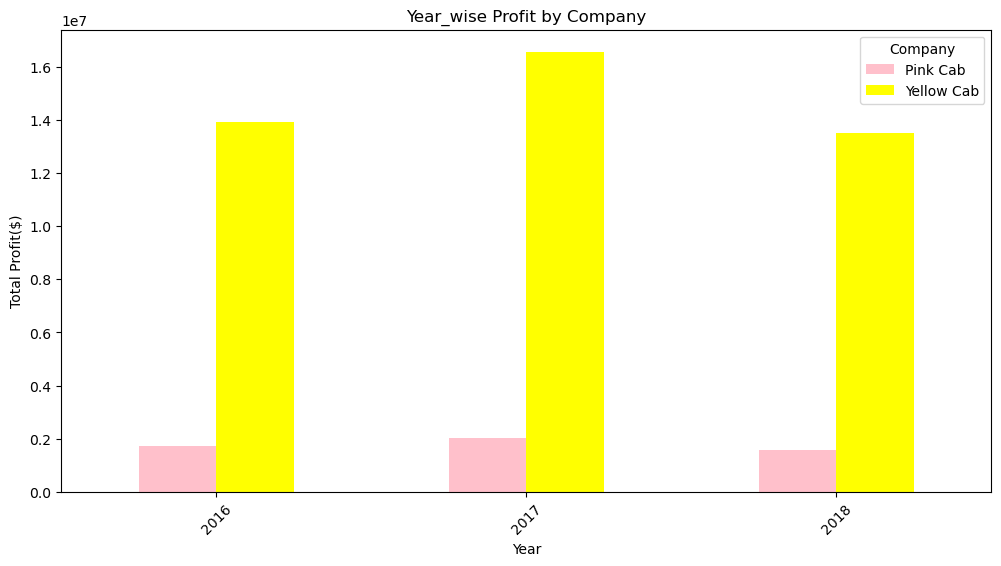

In [38]:
#Yesr wise profit
cab_data['Profit']=cab_data['Price_Charged']- cab_data['Cost_of_Trip']
profit_by_year = cab_data.groupby(['Year', 'Company'])['Profit'].sum().unstack()
plt.figure(figsize=(12,6))
profit_by_year.plot(kind='bar', figsize=(12,6),color=['Pink','yellow'])
plt.title('Year_wise Profit by Company')
plt.xlabel('Year')
plt.ylabel('Total Profit($)')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.savefig('year_wise_profit.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

# Yellow cab performed in every year is higher than pink cab

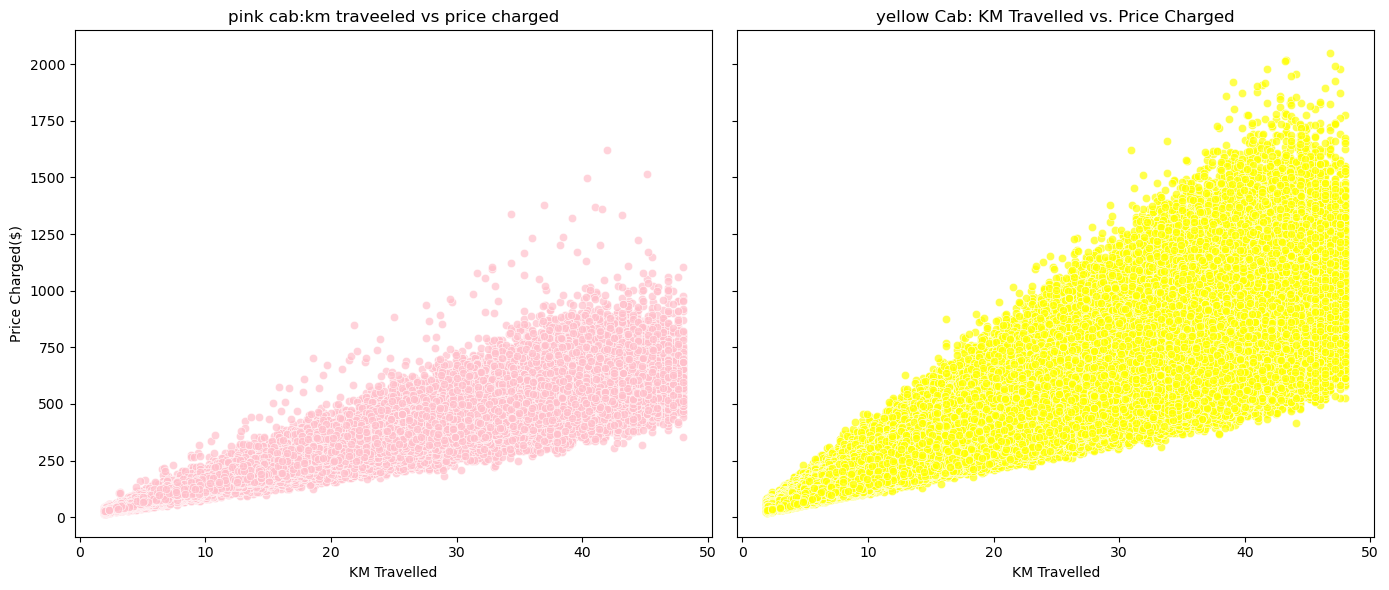

In [39]:
pink_cab_data =cab_data[cab_data['Company'] == 'Pink Cab']
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']
fig,(ax1, ax2) =plt.subplots(ncols=2, figsize=(14,6), sharey=True)
sns.scatterplot(data=pink_cab_data, x='KM_Travelled', y='Price_Charged', color='pink', alpha=0.7,ax=ax1)
ax1.set_title('pink cab:km traveeled vs price charged')
ax1.set_xlabel('KM Travelled')
ax1.set_ylabel('Price Charged($)')
sns.scatterplot(data=yellow_cab_data, x='KM_Travelled', y='Price_Charged', color='yellow', alpha=0.7,ax=ax2)
ax2.set_title('yellow Cab: KM Travelled vs. Price Charged')
ax2.set_xlabel('KM Travelled')
ax2.set_ylabel('')
plt.tight_layout()
plt.savefig('km_traveled.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

# From the avobe graph, we can see both cab km travelled is 2 to 48 km.and price charged is higher in yellow cab

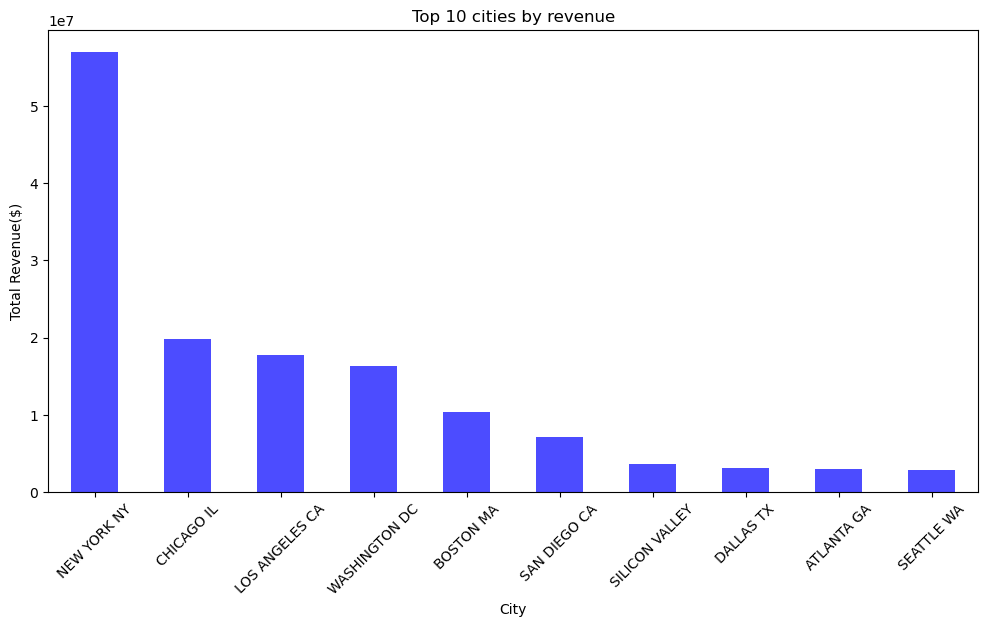

In [40]:
city_revenue = cab_data.groupby('City')['Price_Charged'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
city_revenue.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 cities by revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue($)')
plt.xticks(rotation=45)
plt.savefig('city_revenue.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

# We can see New york making more revenue

# creating master dataset

In [41]:
#merge dataset
cab_merge = cab_data.merge(transaction, on = 'Transaction_ID', how= 'left')
cab_merge2 = cab_merge.merge(customer, on = 'Customer_ID', how= 'left')
master_data = cab_merge2.merge(city_data, on = 'City', how = 'left')

In [42]:
print('Dataset Shape:', master_data.shape)
print('Dataset Info:')
print(master_data.info())
print("\nMissing values:")
print(master_data.isnull().sum())

Dataset Shape: (359392, 17)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Year                359392 non-null  int32         
 8   Month               359392 non-null  int32         
 9   Profit              359392 non-null  float64       
 10  Customer_ID         359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Gender              359392 non-null  object 

In [43]:
master_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,57.315,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,23.666,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,27.568,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,25.798,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,16.844,27182,Card,Male,33,8536,"814,885","24,701"


In [44]:
gender_data= master_data.groupby(['Company', 'Gender']).Customer_ID.nunique()
gender_data

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

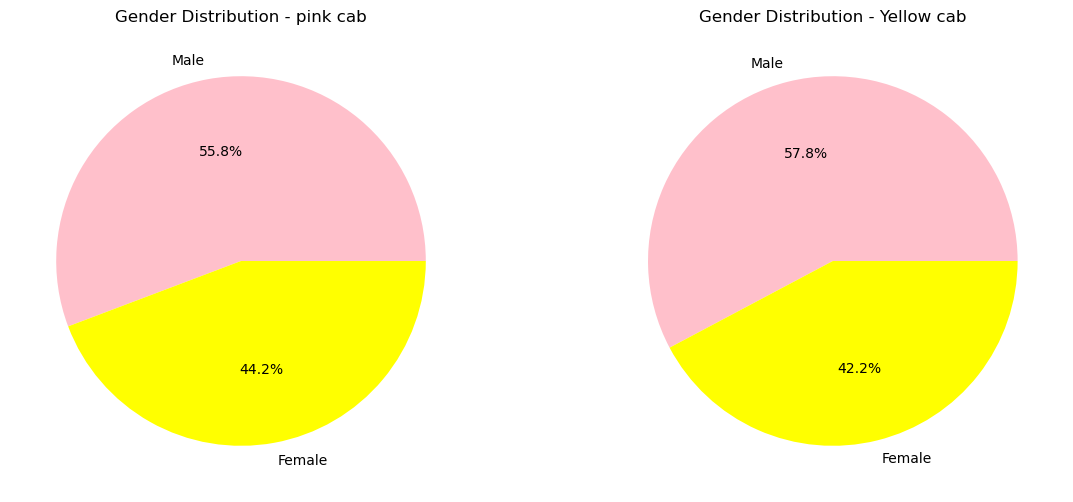

In [45]:
gender_distribution_pink = master_data[master_data['Company']== 'Pink Cab']['Gender'].value_counts(normalize=True)*100
gender_distribution_yellow = master_data[master_data['Company']== 'Yellow Cab']['Gender'].value_counts(normalize=True)*100
fig, axes = plt.subplots(1,2, figsize=(14,6))

axes[0].pie(gender_distribution_pink, labels=gender_distribution_pink.index, autopct= '%1.1f%%', colors=['pink', 'yellow'])
axes[0].set_title('Gender Distribution - pink cab')

axes[1].pie(gender_distribution_yellow, labels=gender_distribution_yellow.index, autopct= '%1.1f%%', colors=['pink', 'yellow'])
axes[1].set_title('Gender Distribution - Yellow cab')
plt.savefig('gender_dis.jpg', format='jpg', bbox_inches = 'tight')
plt.show()


In [46]:
master_data['Margins']=(master_data['Price_Charged']-master_data['Cost_of_Trip'])
master_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Margins
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,57.315,29290,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,23.666,27703,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,27.568,28712,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,25.798,28020,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,16.844,27182,Card,Male,33,8536,"814,885","24,701",16.844


In [47]:
df = master_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income_(USD/Month)','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Margins
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


In [48]:
print(master_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Year                359392 non-null  int32         
 8   Month               359392 non-null  int32         
 9   Profit              359392 non-null  float64       
 10  Customer_ID         359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Gender              359392 non-null  object        
 13  Age                 359392 no

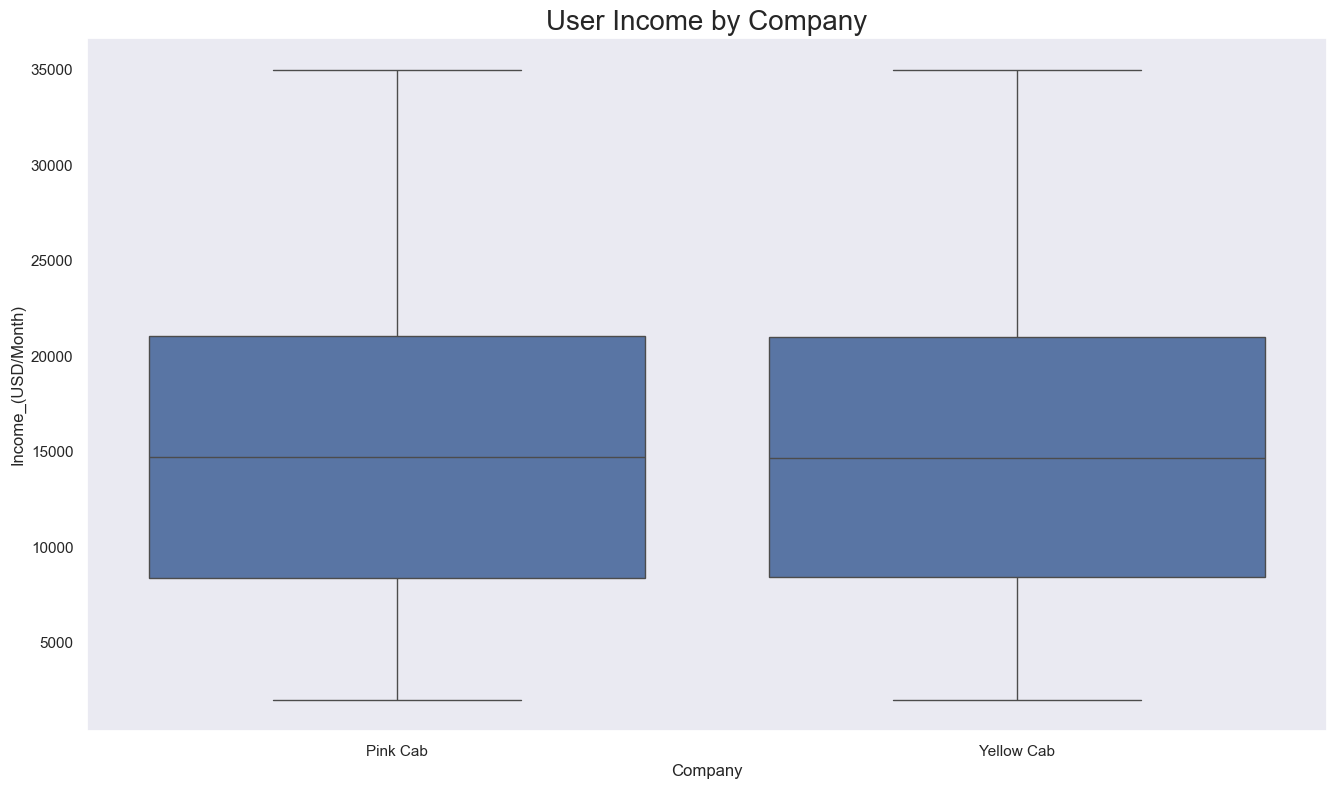

In [49]:
sns.set(style='dark')
plt.figure(figsize=(16,9))
sns.boxplot(x='Company',y='Income_(USD/Month)',data=master_data)
plt.title('User Income by Company', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Income_(USD/Month)')
plt.savefig('users_income.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

In [50]:
#both companies user's average income is $15000

<Figure size 1200x600 with 0 Axes>

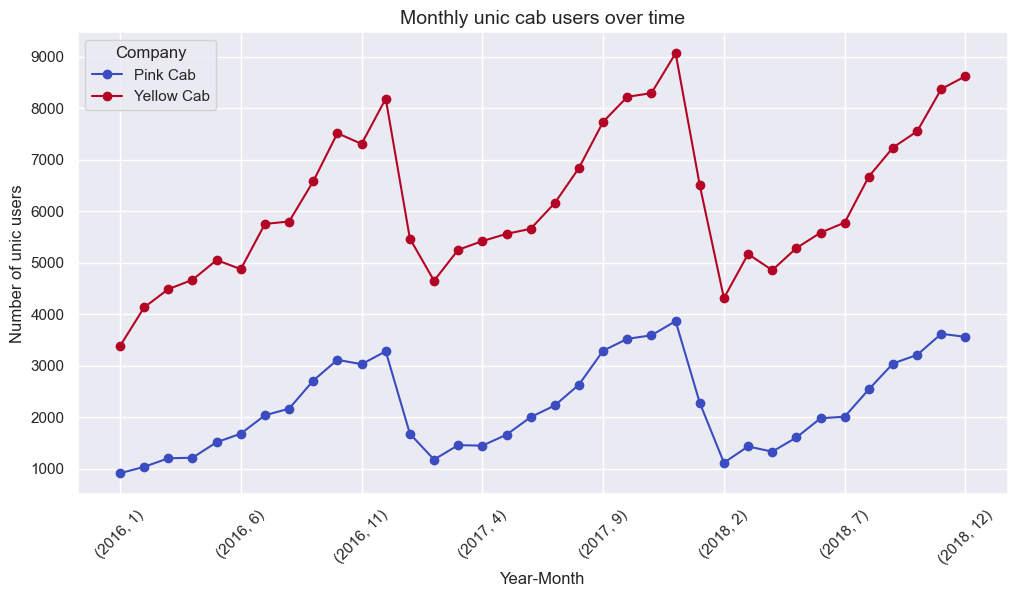

In [51]:
#Which company has maximum cab users at a particular time period? 
#group by Year, Month, and Company and count unique Customer_IDs
time_users= master_data.groupby(['Year','Month','Company'])['Customer_ID'].nunique().reset_index()
time_users_pivot= time_users.pivot_table(index=['Year','Month'],columns='Company',values='Customer_ID',fill_value=0)
plt.figure(figsize=(12,6))
time_users_pivot.plot(kind='line',marker='o',figsize=(12,6),colormap='coolwarm')
plt.title('Monthly unic cab users over time',fontsize=14)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Number of unic users', fontsize=12)
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('unic_cab.jpg', format='jpg', bbox_inches = 'tight')
plt.show()


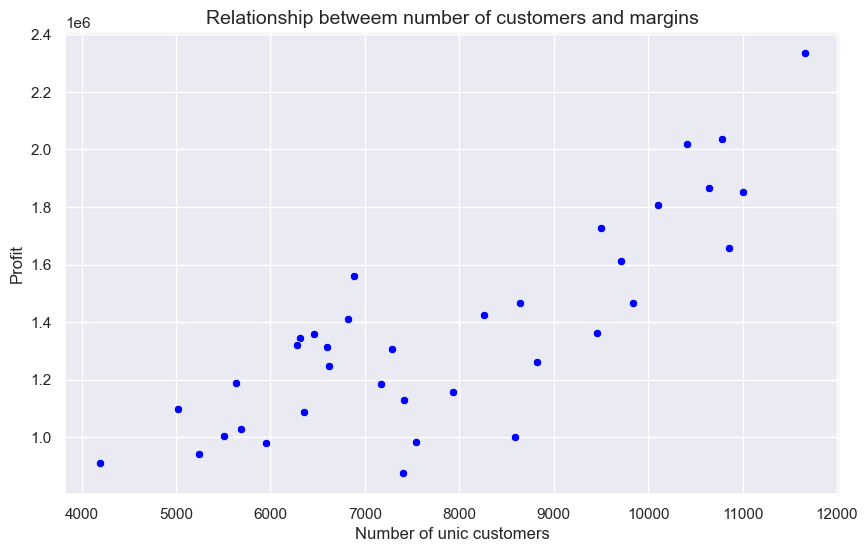

In [52]:
# Group by Year and Month to get total customers and total margin
margin_analysis = master_data.groupby(['Year', 'Month']).agg({'Customer_ID': 'nunique', 'Profit': 'sum'}).reset_index()
plt.figure(figsize=(10,6))
sns.scatterplot(x=margin_analysis['Customer_ID'], y=margin_analysis['Profit'],color='blue')
plt.title('Relationship betweem number of customers and margins',fontsize=14)
plt.xlabel('Number of unic customers', fontsize=12)
plt.grid(True)
plt.savefig('margin.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

In [53]:
#corelation coefficient
correlation,p_value= stats.pearsonr(margin_analysis['Customer_ID'],margin_analysis['Profit'])
print(f'Correlation Coefficient:{correlation:.2f}')
print(f'p-vale:{p_value:.5f}')

Correlation Coefficient:0.82
p-vale:0.00000


In [54]:
print(master_data.dtypes)

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                       object
City                          object
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Year                           int32
Month                          int32
Profit                       float64
Customer_ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income_(USD/Month)             int64
Population                    object
Users                         object
Margins                      float64
dtype: object


In [55]:
df = master_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income_(USD/Month)','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Margins
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


In [56]:
print(df.dtypes)

KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Month                   int32
Year                    int32
Age                     int64
Income_(USD/Month)      int64
Margins               float64
dtype: object


In [57]:

master_data['Margins'] =pd.to_numeric(master_data['Margins'],errors='coerce')
print(df.dtypes)

KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Month                   int32
Year                    int32
Age                     int64
Income_(USD/Month)      int64
Margins               float64
dtype: object


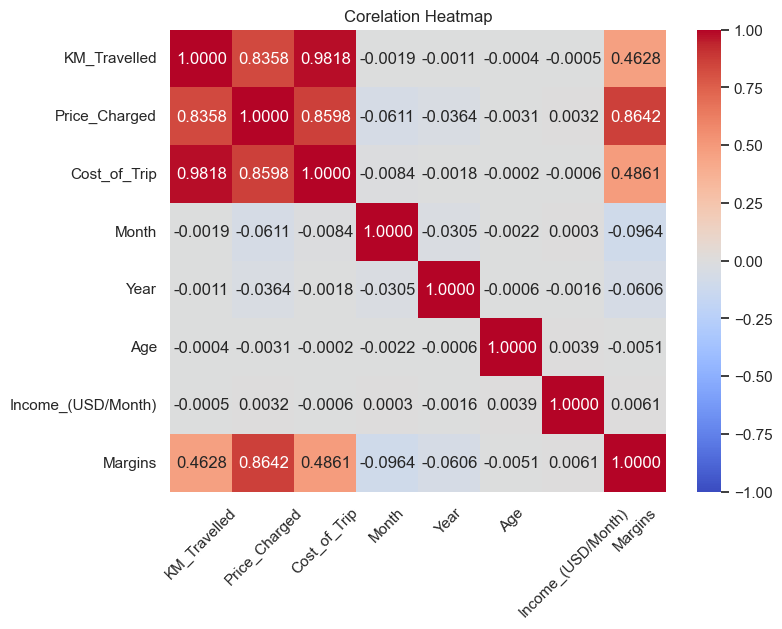

In [58]:
plt. figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='0.4f',cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=45)
plt.title('Corelation Heatmap')
plt.savefig('heatmap.jpg', format='jpg', bbox_inches = 'tight')
plt.show()

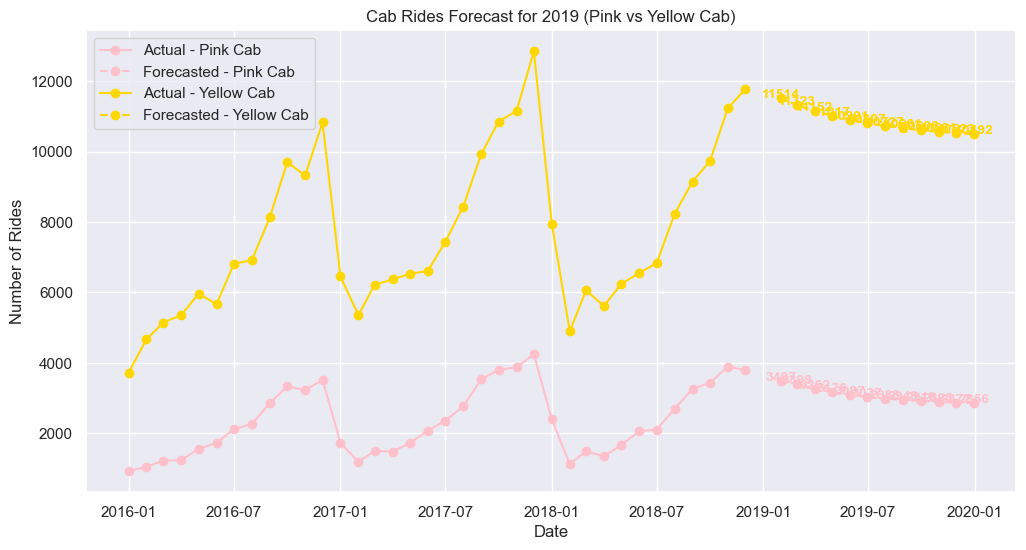

In [59]:
import statsmodels.api as sm
def forecast_rides(company_name, color):
    company_data = master_data[master_data['Company'] == company_name]
    rides_per_month = company_data.groupby(company_data['Date_of_Travel'].dt.to_period('M')).size()
    rides_per_month.index = rides_per_month.index.to_timestamp()

    # Fit ARIMA model
    model = sm.tsa.ARIMA(rides_per_month, order=(2, 1, 2))
    results = model.fit()

    # Forecast for 2019
    forecast_steps = 12
    forecast = results.forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=rides_per_month.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

    # Plot actual vs. forecasted rides
    plt.plot(rides_per_month.index, rides_per_month, marker='o', linestyle='-', color=color, label=f"Actual - {company_name}")
    plt.plot(forecast_index, forecast, marker='o', linestyle='dashed', color=color, label=f"Forecasted - {company_name}")

    # Annotate forecast values
    for x, y in zip(forecast_index, forecast):
        plt.text(x, y, f"{int(y)}", ha='center', fontsize=10, color=color, fontweight='bold')

# Plot forecasts for both companies
plt.figure(figsize=(12, 6))

forecast_rides("Pink Cab", "pink")
forecast_rides("Yellow Cab", "gold")

plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.title("Cab Rides Forecast for 2019 (Pink vs Yellow Cab)")
plt.legend()
plt.grid(True)
plt.savefig('Forcasting.jpg', format='jpg', bbox_inches = 'tight')
plt.show()


Total Customers: 46148
Repeat Customers: 34706
Customer Retention Rate: 75.21%


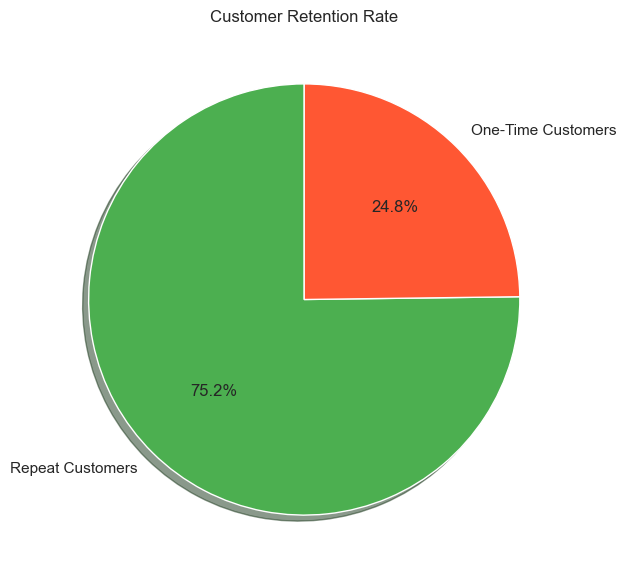

In [60]:
customer_rides = master_data.groupby('Customer_ID')['Transaction_ID'].count()

repeat_customers = customer_rides[customer_rides > 1].count()

total_customers = customer_rides.count()

retention_rate = (repeat_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Repeat Customers: {repeat_customers}")
print(f"Customer Retention Rate: {retention_rate:.2f}%")

labels = ['Repeat Customers', 'One-Time Customers']
values = [repeat_customers, total_customers - repeat_customers]

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FF5733'], startangle=90, shadow=True)
plt.title("Customer Retention Rate")
plt.savefig('retantion1.jpg', format='jpg', bbox_inches = 'tight')
plt.show()


Company
Pink Cab      55.663470
Yellow Cab    69.844095
Name: Transaction_ID, dtype: float64


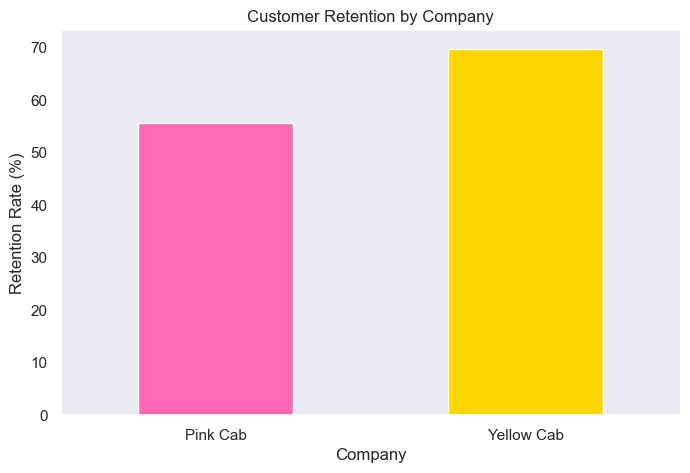

In [61]:
customer_rides = master_data.groupby(['Company', 'Customer_ID'])['Transaction_ID'].count()

repeat_customers = customer_rides[customer_rides > 1].groupby(level=0).count()

total_customers = customer_rides.groupby(level=0).count()

retention_rate = (repeat_customers / total_customers) * 100

print(retention_rate)

# Plot bar chart for retention by company
plt.figure(figsize=(8, 5))
retention_rate.plot(kind='bar', color=['#FF69B4', '#FFD700']) 
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention by Company')
plt.xticks(rotation=0)
plt.savefig('retantion2.jpg', format='jpg', bbox_inches = 'tight')
plt.show()


Age_Group
18-24    16.988819
25-34    23.953367
35-49    20.078877
50-64    11.775158
65+       0.000000
Name: Transaction_ID, dtype: float64


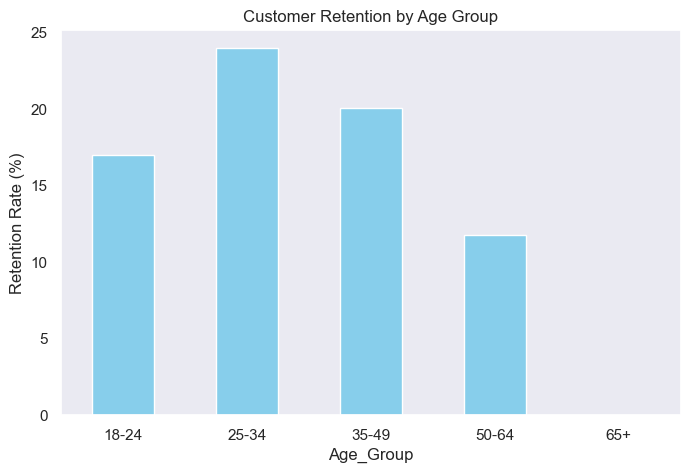

In [62]:
 
bins = [18, 25, 35, 50, 65, 100]  
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
master_data['Age_Group'] = pd.cut(master_data['Age'], bins=bins, labels=labels)

customer_rides_age = master_data.groupby(['Age_Group', 'Customer_ID'])['Transaction_ID'].count()

repeat_customers_age = customer_rides_age[customer_rides_age > 1].groupby(level=0).count()

total_customers_age = customer_rides_age.groupby(level=0).count()


retention_rate_age = (repeat_customers_age / total_customers_age) * 100

print(retention_rate_age)

# Plot bar chart for retention by age group
plt.figure(figsize=(8, 5))
retention_rate_age.plot(kind='bar', color='skyblue')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention by Age Group')
plt.xticks(rotation=0)
plt.savefig('retation3.jpg', format='jpg', bbox_inches = 'tight')
plt.show() 

# hypothesis 01

In [63]:
a = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


In [64]:
a = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])
from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494056e-25


In [65]:
#There is no no difference regarding gender in both companies

In [66]:
#Htpothesis 02

In [67]:
#Age wise Margin
master_data[master_data.Age<=50].groupby('Company').Margins.mean()
master_data[master_data.Age>=50].groupby('Company').Margins.mean()

Company
Pink Cab       62.156779
Yellow Cab    157.482752
Name: Margins, dtype: float64

In [68]:
a = master_data[(master_data.Age<=50)&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = master_data[(master_data.Age>=50)&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

71228 14405
We accept null hypothesis that there is no difference
P value is  0.3905344473325604


In [69]:
a = master_data[(master_data.Age<=50)&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = master_data[(master_data.Age>50)&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.4942568177993685e-09


In [70]:
#Yellow cab may be offered discount